# Descriptive Statistics

In [1]:
# Here are all the imports needed for this phase
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_columns = 42
import warnings
warnings.filterwarnings("ignore")

## During the event

In [2]:
speed_dating_during_event_df = pd.read_csv("during_event.csv")

In [3]:
speed_dating_during_event_df.head()

,iid,gender,wave,round,position,order,pid,match,int_corr,samerace,age,race,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,age_o,race_o,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,match_es
0,1,0,1,10,7,4,11.0,0,0.14,0,21.0,4.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,27.0,2.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,4.0
1,1,0,1,10,7,3,12.0,0,0.54,0,21.0,4.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,22.0,2.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,4.0
2,1,0,1,10,7,10,13.0,1,0.16,1,21.0,4.0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,22.0,4.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,4.0
3,1,0,1,10,7,5,14.0,1,0.61,0,21.0,4.0,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,23.0,2.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,4.0
4,1,0,1,10,7,7,15.0,1,0.21,0,21.0,4.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,24.0,3.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,4.0


In [4]:
speed_dating_during_event_df.shape

(8378, 35)

In [5]:
speed_dating_during_event_df["iid"].nunique()

551

In [6]:
speed_dating_during_event_df.loc[speed_dating_during_event_df["iid"].duplicated() == False, "gender"].value_counts()

1    277
0    274
Name: gender, dtype: int64

In [7]:
speed_dating_during_event_df["wave"].nunique()

21

In [8]:
speed_dating_during_event_df.loc[speed_dating_during_event_df["iid"].duplicated() == False, "met"].value_counts()

2.0    524
1.0     27
Name: met, dtype: int64

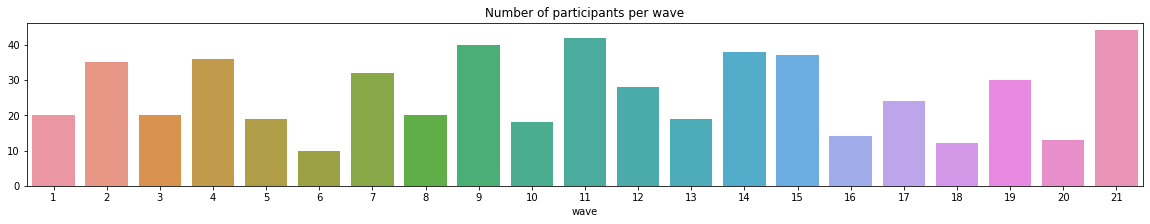

In [9]:
plt.figure(figsize=(20, 3))

sns.barplot(data=speed_dating_during_event_df.loc[speed_dating_during_event_df["iid"].duplicated() == False, 
                                                  ["wave", "round"]].groupby("wave").count().reset_index(),
            x="wave",
            y="round")
plt.title("Number of participants per wave")
plt.ylabel('')

plt.show()

* We recall that 551 people (274 women and 277 men) participated in 21 speed dating events. Of these participants, only 27 had met before the event.
* There are waves where less than 14 people in total met (waves n°6, 16, 18, 20) as well as waves where more than 32 people, almost as many women as men, came to participate in these events (waves 2, 4, 7, 9, 11, 14, 15, 19, 21).

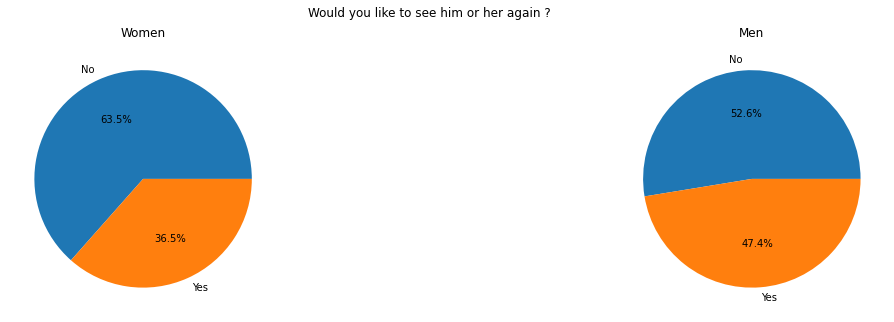

In [10]:
plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.pie(speed_dating_during_event_df.loc
            [(speed_dating_during_event_df["gender"] == 0), ["iid", "dec"]]
        .groupby("iid")["dec"]
        .value_counts()
        .sum(level="dec")
        .sort_index(),
        labels=["No", "Yes"],
        autopct='%1.1f%%')
plt.title("Women")

plt.subplot(122)
plt.pie(speed_dating_during_event_df.loc
            [(speed_dating_during_event_df["gender"] == 1), ["iid", "dec"]]
        .groupby("iid")["dec"]
        .value_counts()
        .sum(level="dec")
        .sort_index(),
        labels=["No", "Yes"],
        autopct='%1.1f%%')
plt.title("Men")

plt.suptitle("Would you like to see him or her again ?")
plt.show()

Just over 60% of the women do not want to see the partner they met at the event again, while almost 53% of the men would not like to see the women they met again : it seems that women are more disappointed by the men they met.

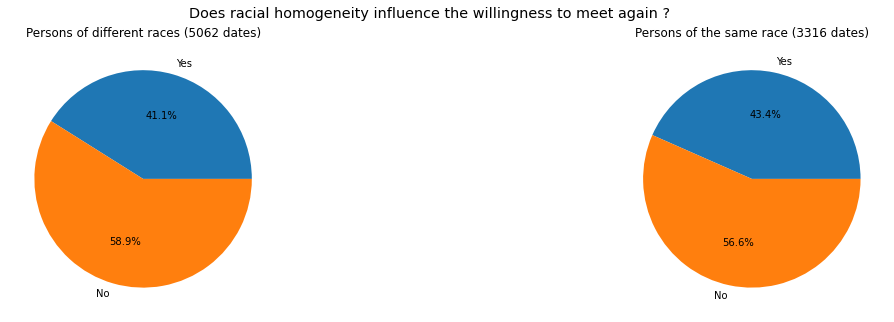

In [11]:
plt.figure(figsize=(20, 5))

different_races_count = (speed_dating_during_event_df.loc
                            [(speed_dating_during_event_df["samerace"] == 0), ["iid", "dec"]]
                        .groupby("iid")["dec"]
                        .value_counts()
                        .sum())
same_race_count = (speed_dating_during_event_df.loc
                        [(speed_dating_during_event_df["samerace"] == 1), ["iid", "dec"]]
                    .groupby("iid")["dec"]
                    .value_counts()
                    .sum())

plt.subplot(121)
plt.pie(speed_dating_during_event_df.loc
            [(speed_dating_during_event_df["samerace"] == 0), ["iid", "dec"]]
        .groupby("iid")["dec"]
        .value_counts()
        .sum(level="dec"),
        labels=["Yes", "No"],
        autopct='%1.1f%%')
plt.title("Persons of different races (%d dates)" % different_races_count)

plt.subplot(122)
plt.pie(speed_dating_during_event_df.loc
            [(speed_dating_during_event_df["samerace"] == 1), ["iid", "dec"]]
        .groupby("iid")["dec"]
        .value_counts()
        .sum(level="dec"),
        labels=["Yes", "No"],
        autopct='%1.1f%%')
plt.title("Persons of the same race (%d dates)" % same_race_count)

plt.suptitle("Does racial homogeneity influence the willingness to meet again ?", fontsize="x-large")
plt.show()

Looking at the pie charts, the race of the partner does not seem to have an influence on the decision to see the other again. The proportions are very close in both charts.

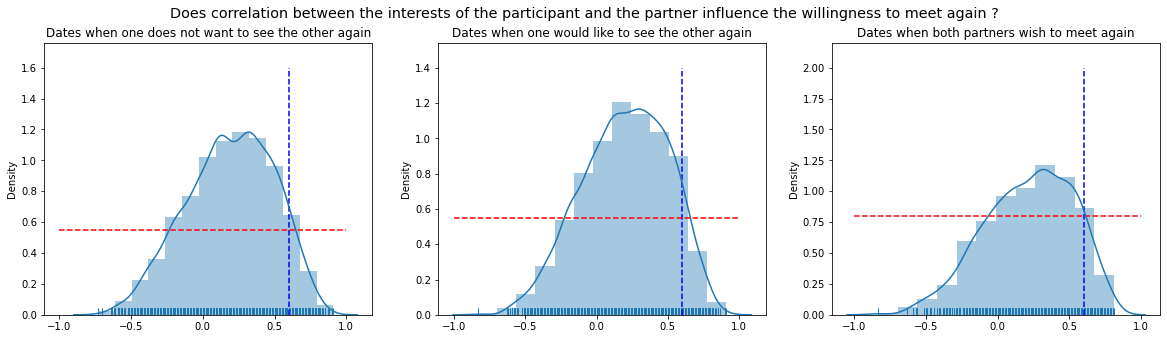

In [12]:
plt.figure(figsize=(20,5))

plt.subplot(131)
sns.distplot(
    speed_dating_during_event_df.loc
            [(speed_dating_during_event_df["dec"] == 0),
            "int_corr"], 
    rug=True, 
    bins="sturges"
)
plt.vlines(.6, 0, 1.6, colors="blue", linestyles="dashed")
plt.hlines(.55, -1, 1, colors="red", linestyles="dashed")
plt.xlabel('')
plt.title("Dates when one does not want to see the other again")

plt.subplot(132)
sns.distplot(
    speed_dating_during_event_df.loc
            [(speed_dating_during_event_df["dec"] == 1),
            "int_corr"], 
    rug=True, 
    bins="sturges"
)
plt.vlines(.6, 0, 1.4, colors="blue", linestyles="dashed")
plt.hlines(.55, -1, 1, colors="red", linestyles="dashed")
plt.xlabel('')
plt.title("Dates when one would like to see the other again")

plt.subplot(133)
sns.distplot(
    speed_dating_during_event_df.loc
            [(speed_dating_during_event_df["match"] == 1),
            "int_corr"], 
    rug=True, 
    bins="sturges"
)
plt.vlines(.6, 0, 2, colors="blue", linestyles="dashed")
plt.hlines(.8, -1, 1, colors="red", linestyles="dashed")
plt.xlabel('')
plt.title("Dates when both partners wish to meet again")

plt.suptitle("Does correlation between the interests of the participant and the partner influence the willingness to meet again ?", 
            fontsize="x-large")
plt.show()

We look at whether a high positive correlation (greater than 0.6) between the interests of the two partners who meet leads to a change in the decision to see the other again. As can be seen, there is no influence of a positive correlation rate : the tails of distributions are spread to the left (values below 0.6), which means that there are many more individuals in this range, regardless of whether the participant decides to meet his/her partner again or whether both decide to meet again (in other words, a match).

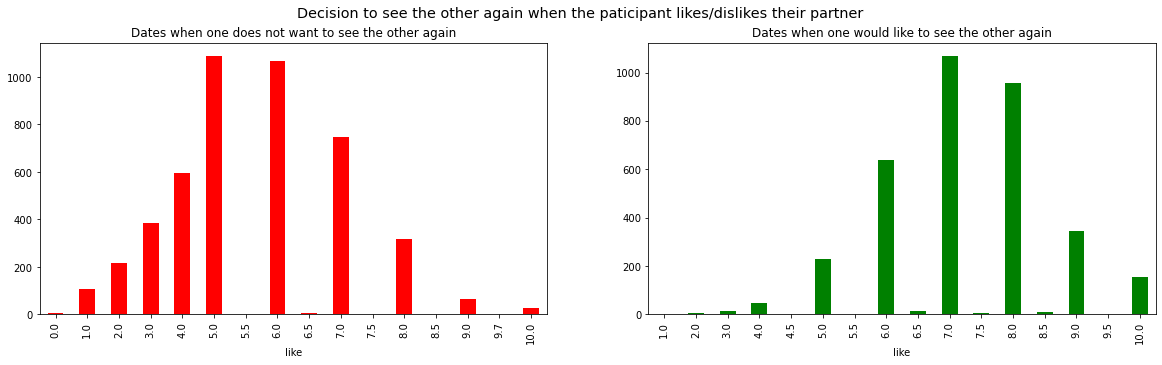

In [13]:
plt.figure(figsize=(20,5))

plt.subplot(121)
(speed_dating_during_event_df.loc
    [(speed_dating_during_event_df["dec"] == 0), 
    ["iid", "like"]]
.groupby("iid")["like"]
.value_counts()
.sum(level="like")
.sort_index()
.plot
.bar(color='red'))
plt.title("Dates when one does not want to see the other again")

plt.subplot(122)
(speed_dating_during_event_df.loc
    [(speed_dating_during_event_df["dec"] == 1), 
    ["iid", "like"]]
.groupby("iid")["like"]
.value_counts()
.sum(level="like")
.sort_index()
.plot
.bar(color='green'))
plt.title("Dates when one would like to see the other again")

plt.suptitle("Decision to see the other again when the paticipant likes/dislikes their partner", fontsize="x-large")
plt.show()

* It is not surprising that participants who would like  to see the other person again indicate high values for the __like__ feature : the highest numbers are for values 6, 7 and 8.
* For participants who do not wish to see the other person again, values 5 (neutral opinion), 6 and 7 (good opinion) are the ones most often given to the question "how much do you like this person ?".

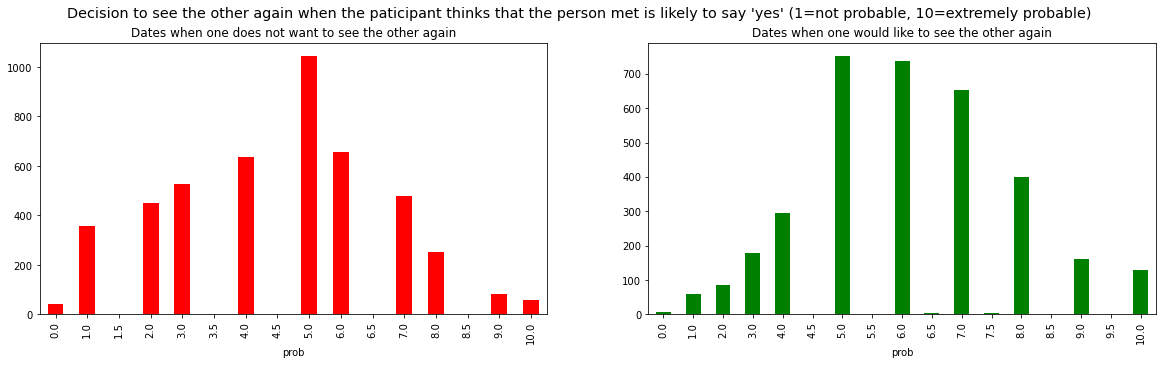

In [14]:
plt.figure(figsize=(20,5))

plt.subplot(121)
(speed_dating_during_event_df.loc
    [(speed_dating_during_event_df["dec"] == 0), 
    ["iid", "prob"]]
.groupby("iid")["prob"]
.value_counts()
.sum(level="prob")
.sort_index()
.plot
.bar(color='red'))
plt.title("Dates when one does not want to see the other again")

plt.subplot(122)
(speed_dating_during_event_df.loc
    [(speed_dating_during_event_df["dec"] == 1), 
    ["iid", "prob"]]
.groupby("iid")["prob"]
.value_counts()
.sum(level="prob")
.sort_index()
.plot
.bar(color='green'))
plt.title("Dates when one would like to see the other again")

plt.suptitle("Decision to see the other again when the paticipant thinks that the person met is likely to say 'yes' (1=not probable, 10=extremely probable)", 
             fontsize="x-large")
plt.show()

* When participants do not wish to meet the other person again, it seems that they have no idea of the probability that the other person will say "yes" to them : the value 5 is the most often given, followed by the values 6, 4, 3, 7.
* On the contrary, participants who want to see the partner they have just met again are self-confident. They strongly believe that the other person also wants to see them again (high numbers of people for values 6, 7, 8).

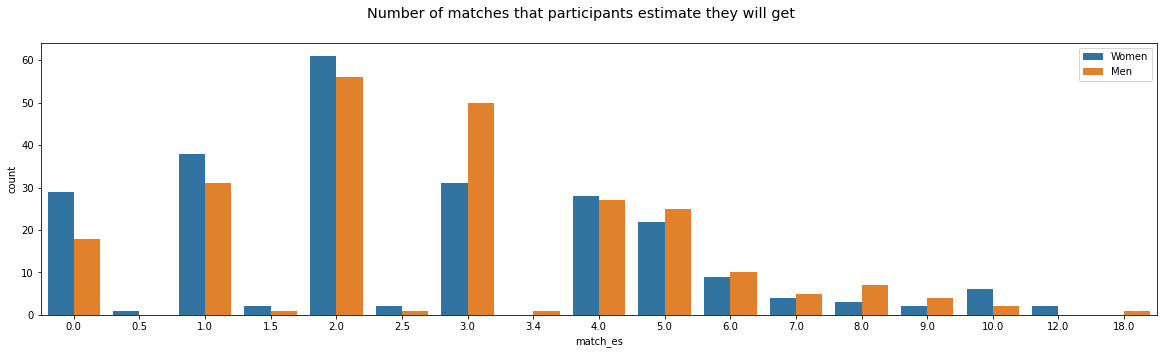

In [15]:
plt.figure(figsize=(20,5))

sns.countplot(data=speed_dating_during_event_df.loc[
                (speed_dating_during_event_df["iid"].duplicated() == False), 
                ["match_es", "gender"]],
              hue="gender",
              x="match_es"
             )
plt.legend(["Women", "Men"], loc='upper right')

plt.suptitle("Number of matches that participants estimate they will get", fontsize="x-large")
plt.show()

In [16]:
speed_dating_during_event_df.loc[
    (speed_dating_during_event_df["iid"].duplicated() == False) & (speed_dating_during_event_df["match_es"] == 18), ]

,iid,gender,wave,round,position,order,pid,match,int_corr,samerace,age,race,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,age_o,race_o,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,match_es
3128,220,1,9,20,2,9,194.0,0,-0.22,0,25.0,6.0,0,5.0,8.0,8.0,7.0,9.0,0.0,2.0,1.0,2.0,24.0,2.0,0,6.0,10.0,10.0,9.0,10.0,7.0,7.0,7.0,2.0,18.0


In [17]:
speed_dating_during_event_df.loc[speed_dating_during_event_df["iid"] == 220, ].groupby("iid")["match"].sum()

iid
220    3
Name: match, dtype: int64

* There are no big differences between women and men. The high numbers that we read for the values 0, 1, 2 and 3 are not present because many participants are humble and underestimate their seductive power, but rather because the number of people met during the event is low (except for a few waves), as we have seen above.
* The participant who estimated he would get 18 matches was a 25 years old man who met 20 women that night and ... only got 3 matches. What a good estimate !

In [18]:
def plot_score_during_event(field, title, ylabel='', legend='', ax_plot=None, bins=10, statistic='count', anchor=None):
    sns.histplot(data=speed_dating_during_event_df.loc[:, [field, "gender"]],
                  x=field,
                  hue="gender",
                  hue_order=[0, 1],
                  palette={0:'red', 1:'blue'},
                  element="step", 
                  bins=bins,
                  stat=statistic,
                  ax=ax_plot
             )
    if ax_plot is None:
        plt.legend(legend, ncol=2, bbox_to_anchor=anchor)
        plt.xlabel('')
        plt.ylabel(ylabel, fontsize='x-large')
        plt.title(title, loc='left')
    else:
        ax_plot.set_xlabel('')
        ax_plot.set_ylabel(ylabel, fontsize='x-large')
        ax_plot.legend(legend, ncol=2, bbox_to_anchor=anchor)
        ax_plot.set_title(title, loc='left')

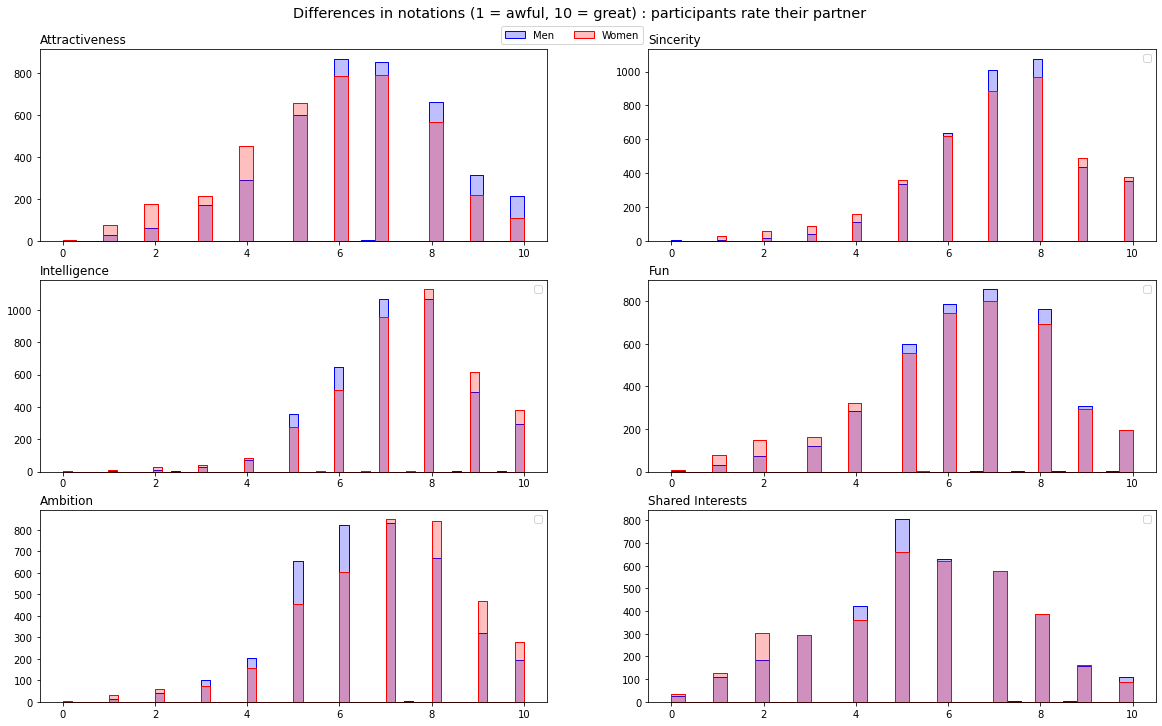

In [19]:
plt.figure(figsize=(20,12))

fields = {
            "Attractiveness":"attr",
            "Sincerity":"sinc",
            "Intelligence":"intel",
            "Fun":"fun",
            "Ambition":"amb",
            "Shared Interests":"shar"
}

for ind, elt in enumerate(fields):
    plt.subplot(3, 2, ind + 1)
    if ind + 1 == 1:
        plot_score_during_event(fields[elt], title=elt, legend=["Men", "Women"], anchor=(1.2, 1.15), bins='auto')
    else:
        plot_score_during_event(fields[elt], title=elt, bins='auto')

plt.suptitle("Differences in notations (1 = awful, 10 = great) : participants rate their partner", 
             fontsize="x-large",
             y= .93)
plt.show()

* Attractiveness : men are slightly more likely to give good marks to women (above 6).
* Sincerity : most participants found their partners sincere (scores above 6), to be more precise there are more men who gave scores of 7 and 8 and there are more women who gave scores of 9 and 10.
* Intelligence : most participants recognised the intelligence of the partners they met; men were slightly more likely to give low average ratings, and women were more likely to give high average ratings.
* Fun : the majority of participants gave their partners a score between 5 and 8, although women were slightly more likely to give low scores (below 4).
* Ambition : the same remarks can be made as for the intelligence attribute; far more women gave very good scores (above 7) and more men than women gave lower scores (ratings of 5 and 6).
* Shared interests : it is more nuanced than for the other attributes; the most frequent ratings given are (in ascending order) 5, 6, 7 and 4. Besides, men were more undecided since they were more likely to give a score of 5.

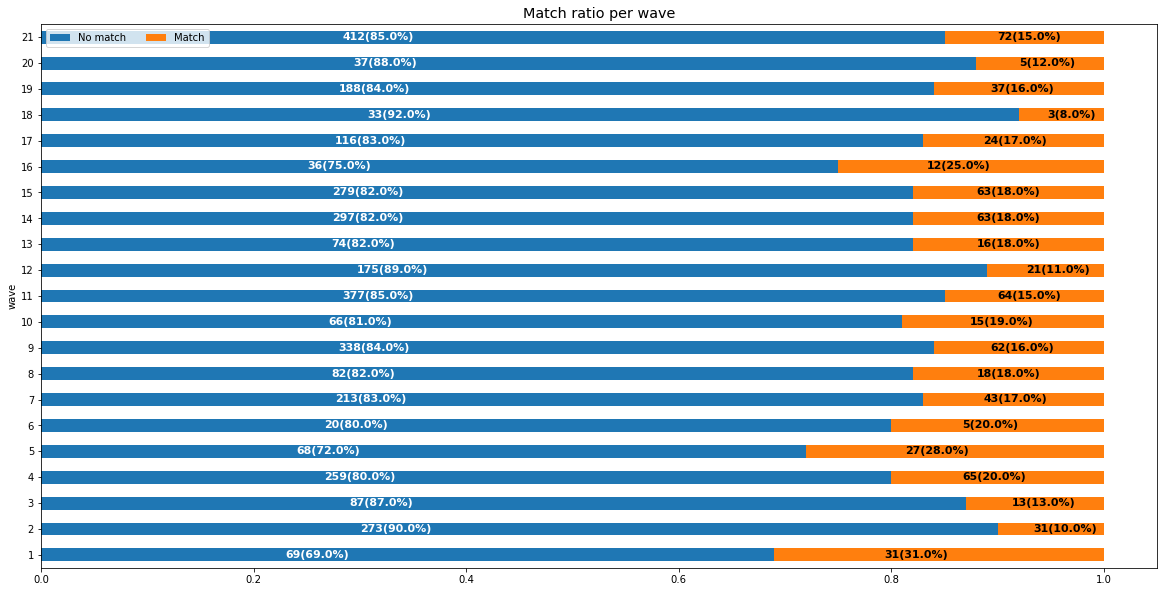

In [20]:
speed_dating_during_event_match_per_wave_df = pd.pivot_table(
                                                    data=speed_dating_during_event_df[["wave", "iid", "match"]],
                                                    values="iid",
                                                    index="wave",
                                                    columns="match",
                                                    aggfunc=lambda x : len(x) / 2
                                                )

speed_dating_during_event_match_ratio_per_wave_df = pd.crosstab(index=speed_dating_during_event_df["wave"],
                                                        columns=speed_dating_during_event_df["match"],
                                                        values=speed_dating_during_event_df["match"],
                                                        aggfunc=lambda x : len(x) / 2,
                                                        normalize='index'
                                                    ).round(2)

speed_dating_during_event_match_ratio_per_wave_df.plot(kind='barh', stacked=True, figsize=(20,10), rot=1)

for ind, elt in enumerate(speed_dating_during_event_match_per_wave_df.index.values):
    for (proportion, count, location) in zip(speed_dating_during_event_match_ratio_per_wave_df.loc[elt],
                                             speed_dating_during_event_match_per_wave_df.loc[elt],
                                             speed_dating_during_event_match_ratio_per_wave_df.loc[elt].cumsum()):
        plt.text(y=ind - 0.11,
                 x=(location - proportion) + proportion / 3,
                 s=f'{count}({np.round(proportion * 100, 2)}%)', 
                 color=('black' if location == 1 else 'white'),
                 fontsize=11,
                 fontweight="semibold"
                 )
        
plt.legend(["No match", "Match"], ncol=2, loc='upper left')
plt.xlabel('')
plt.title("Match ratio per wave", fontsize='x-large')
plt.show()

<!-- waves 1, 5, 16 ->less than 20 people
 waves 2, 12, 18 -> +30, between 20 and 30, 10 -->
* On all waves, there are less than 20% matches among all couples who met at the event.
* 3 events are more successful: wave n°1 with 31% matches, wave n°5 with 28% matches and wave n°16 with 25% matches.
* The events where few couples were formed were wave n°2 with 10% matches, wave n°12 with 11% matches and wave n°18 with only 8% matches.

### In summary

* More than 50% of the participants do not want to see the partner they met again.
* As we saw earlier in Part I, the race of the partner has no influence on the participants' decision to see the other again.
* The vast majority of participants expect to have less than 3 matches at the end of the event.
* Men are more likely to give high marks to the attribute "attractiveness".
* Overall, participants found the partners they met at the event really sincere.
* Although the number of participants is not the same for all waves, the match rate is roughly the same (around 20%).

## The day after

In [21]:
speed_dating_day_after_df = pd.read_csv("day_after.csv")

In [22]:
speed_dating_day_after_df.head()

,iid,gender,wave,round,age,race,dec,like,prob,met,match,satis_2,length,numdat_2,samerace,match_es,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2
0,1,0,1,10,21.0,4.0,1,7.0,6.0,2.0,0,6.0,2.0,1.0,0,4.0,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,1,10,21.0,4.0,1,7.0,5.0,1.0,0,6.0,2.0,1.0,0,4.0,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,1,10,21.0,4.0,1,7.0,NaN,1.0,1,6.0,2.0,1.0,1,4.0,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,1,10,21.0,4.0,1,7.0,6.0,2.0,1,6.0,2.0,1.0,0,4.0,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,1,10,21.0,4.0,1,6.0,6.0,2.0,1,6.0,2.0,1.0,0,4.0,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN


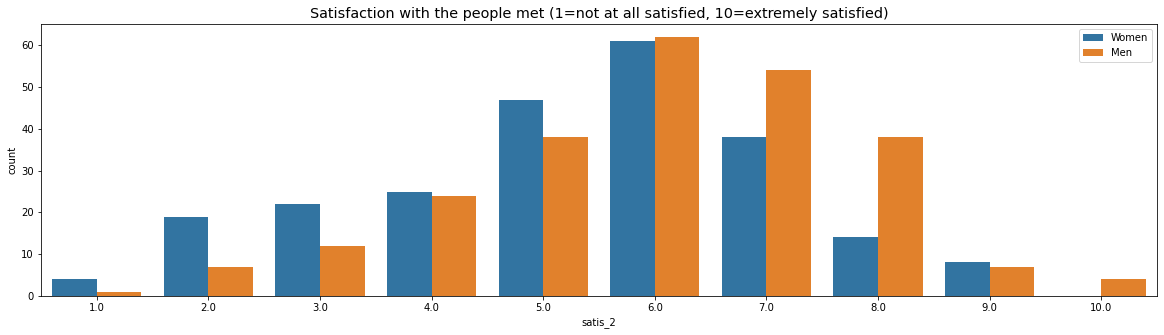

In [23]:
plt.figure(figsize=(20, 5))

sns.countplot(data=speed_dating_day_after_df.loc[
                (speed_dating_day_after_df["iid"].duplicated() == False), 
                ["satis_2", "gender"]],
              hue="gender",
              x="satis_2"
             )
plt.legend(["Women", "Men"], loc='upper right')

plt.title("Satisfaction with the people met (1=not at all satisfied, 10=extremely satisfied)", fontsize='x-large')
plt.show()

* Overall, both women and men were not very satisfied with the people they met since the most frequent value given was 6.
* Women seem less satisfied than men as there are more women who gave scores below 6 than women who gave scores above 6.
* On the contrary, men are more satisfied as we have a high number of people for values above 6, there are even men who gave a score of 10.

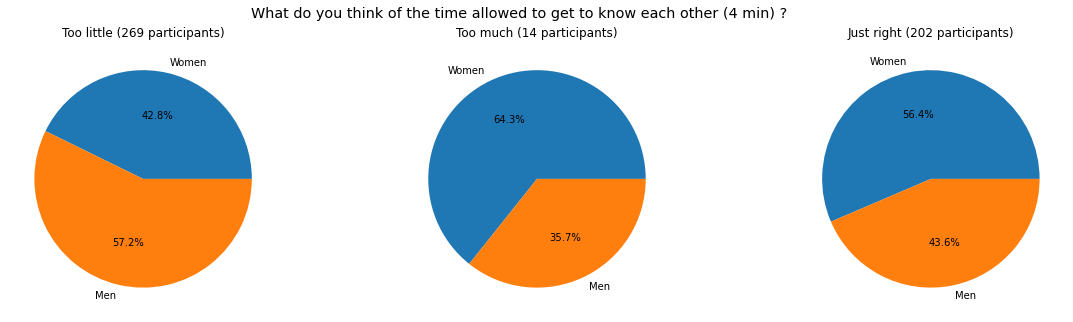

In [24]:
plt.figure(figsize=(20, 5))

headcount_too_little = speed_dating_day_after_df.loc[
                    (speed_dating_day_after_df["iid"].duplicated() == False) & (speed_dating_day_after_df["length"] == 1), 
                    "gender"].count()
headcount_too_much = speed_dating_day_after_df.loc[
                    (speed_dating_day_after_df["iid"].duplicated() == False) & (speed_dating_day_after_df["length"] == 2), 
                    "gender"].count()
headcount_just_right = speed_dating_day_after_df.loc[
                    (speed_dating_day_after_df["iid"].duplicated() == False) & (speed_dating_day_after_df["length"] == 3), 
                    "gender"].count()

plt.subplot(131)
plt.pie(speed_dating_day_after_df.loc[
        (speed_dating_day_after_df["iid"].duplicated() == False) & (speed_dating_day_after_df["length"] == 1), 
        "gender"].value_counts().sort_index(),
        labels=["Women", "Men"],
        autopct='%1.1f%%')
plt.title("Too little (%d participants)" % headcount_too_little)

plt.subplot(132)
plt.pie(speed_dating_day_after_df.loc[
        (speed_dating_day_after_df["iid"].duplicated() == False) & (speed_dating_day_after_df["length"] == 2), 
        "gender"].value_counts().sort_index(),
        labels=["Women", "Men"],
        autopct='%1.1f%%')
plt.title("Too much (%d participants)" % headcount_too_much)

plt.subplot(133)
plt.pie(speed_dating_day_after_df.loc[
        (speed_dating_day_after_df["iid"].duplicated() == False) & (speed_dating_day_after_df["length"] == 3), 
        "gender"].value_counts().sort_index(),
        labels=["Women", "Men"],
        autopct='%1.1f%%')
plt.title("Just right (%d participants)" % headcount_just_right)

plt.suptitle("What do you think of the time allowed to get to know each other (4 min) ?", fontsize='x-large')
plt.show()

In [25]:
(speed_dating_day_after_df.loc[speed_dating_day_after_df["iid"].duplicated() == False,  ["iid", "gender", "length"]]
.pivot_table(index="length",
             columns="gender",
             values="iid",
             aggfunc='count'
)).rename(columns={0: "Women", 1: "Men"}, index={1: "Too little", 2: "Too much", 3: "Just right"})

gender,Women,Men
length,,
Too little,115,154
Too much,9,5
Just right,114,88


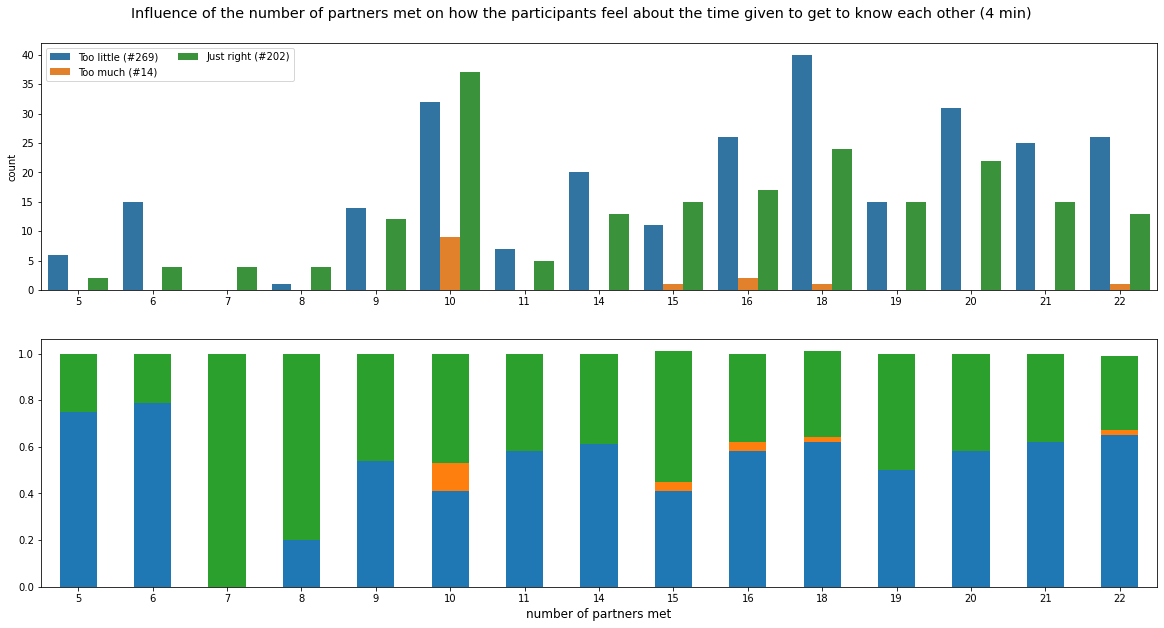

In [26]:
fix, axs = plt.subplots(2, 1, figsize=(20, 10))

headcount_too_little = speed_dating_day_after_df.loc[
                    (speed_dating_day_after_df["iid"].duplicated() == False) & (speed_dating_day_after_df["length"] == 1), 
                    "round"].count()
headcount_too_much = speed_dating_day_after_df.loc[
                    (speed_dating_day_after_df["iid"].duplicated() == False) & (speed_dating_day_after_df["length"] == 2), 
                    "round"].count()
headcount_just_right = speed_dating_day_after_df.loc[
                    (speed_dating_day_after_df["iid"].duplicated() == False) & (speed_dating_day_after_df["length"] == 3), 
                    "round"].count()

sns.countplot(data=speed_dating_day_after_df.loc[
            (speed_dating_day_after_df["iid"].duplicated() == False), 
            ["round", "length"]],
              x="round",
              hue="length",
              ax=axs[0]
             )
axs[0].legend(["Too little (#%d)" % headcount_too_little, 
            "Too much (#%d)" % headcount_too_much,
            "Just right (#%d)" % headcount_just_right], ncol=2, loc='upper left')
axs[0].set_xlabel('')


(pd.crosstab(index=speed_dating_day_after_df.loc[speed_dating_day_after_df["iid"].duplicated() == False, "round"],
            columns=speed_dating_day_after_df.loc[speed_dating_day_after_df["iid"].duplicated() == False, "length"],
           normalize='index')
.round(2)
.plot(kind='bar', 
      stacked=True,
      rot=1,
      ax=axs[1],
     legend=False)
)
axs[1].set_xlabel("number of partners met", fontsize='large')

plt.suptitle("Influence of the number of partners met on how the participants feel about the time given to get to know each other (4 min)", fontsize='x-large', y=0.93)
plt.show()

* Very few people (14 women and men) think that time to get to know each other is too much/long.
* The majority of men think that 4 minutes is too short/little to get to know the person they have just met.
* There are as many women who consider the time given by the event organisers as just right/fair as there are women who think it is too little/short. 
* It seems that the number of partners met has no influence on the answer to this question.

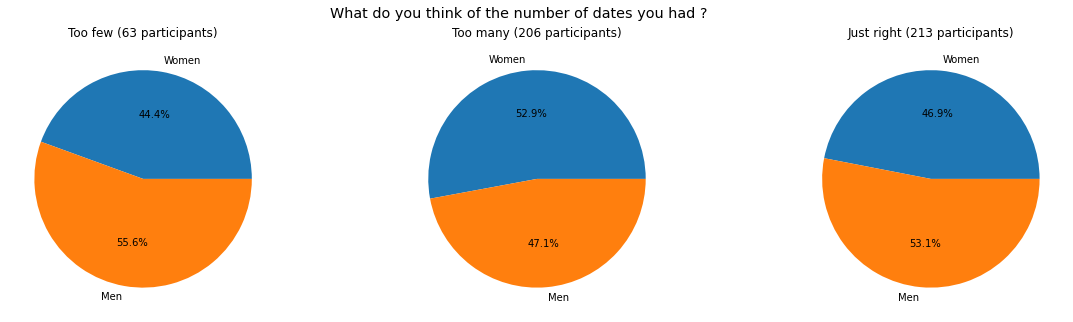

In [27]:
plt.figure(figsize=(20, 5))

headcount_too_few = speed_dating_day_after_df.loc[
                    (speed_dating_day_after_df["iid"].duplicated() == False) & (speed_dating_day_after_df["numdat_2"] == 1), 
                    "gender"].count()
headcount_too_many = speed_dating_day_after_df.loc[
                    (speed_dating_day_after_df["iid"].duplicated() == False) & (speed_dating_day_after_df["numdat_2"] == 2), 
                    "gender"].count()
headcount_just_right = speed_dating_day_after_df.loc[
                    (speed_dating_day_after_df["iid"].duplicated() == False) & (speed_dating_day_after_df["numdat_2"] == 3), 
                    "gender"].count()

plt.subplot(131)
plt.pie(speed_dating_day_after_df.loc[
        (speed_dating_day_after_df["iid"].duplicated() == False) & (speed_dating_day_after_df["numdat_2"] == 1), 
        "gender"].value_counts().sort_index(),
        labels=["Women", "Men"],
        autopct='%1.1f%%')
plt.title("Too few (%d participants)" % headcount_too_few)

plt.subplot(132)
plt.pie(speed_dating_day_after_df.loc[
        (speed_dating_day_after_df["iid"].duplicated() == False) & (speed_dating_day_after_df["numdat_2"] == 2), 
        "gender"].value_counts().sort_index(),
        labels=["Women", "Men"],
        autopct='%1.1f%%')
plt.title("Too many (%d participants)" % headcount_too_many)

plt.subplot(133)
plt.pie(speed_dating_day_after_df.loc[
        (speed_dating_day_after_df["iid"].duplicated() == False) & (speed_dating_day_after_df["numdat_2"] == 3), 
        "gender"].value_counts().sort_index(),
        labels=["Women", "Men"],
        autopct='%1.1f%%')
plt.title("Just right (%d participants)" % headcount_just_right)

plt.suptitle("What do you think of the number of dates you had ?", fontsize='x-large')
plt.show()

In [28]:
(speed_dating_day_after_df.loc[speed_dating_day_after_df["iid"].duplicated() == False,  ["iid", "gender", "numdat_2"]]
.pivot_table(index="numdat_2",
             columns="gender",
             values="iid",
             aggfunc='count'
)).rename(columns={0: "Women", 1: "Men"}, index={1: "Too few", 2: "Too many", 3: "Just right"})

gender,Women,Men
numdat_2,,
Too few,28,35
Too many,109,97
Just right,100,113


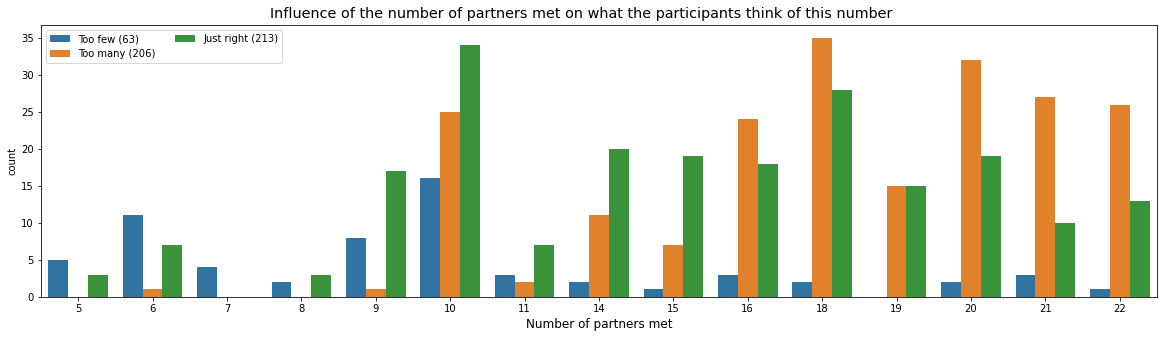

In [29]:
plt.figure(figsize=(20, 5))

headcount_too_few = speed_dating_day_after_df.loc[
                    (speed_dating_day_after_df["iid"].duplicated() == False) & (speed_dating_day_after_df["numdat_2"] == 1), 
                    "round"].count()
headcount_too_many = speed_dating_day_after_df.loc[
                    (speed_dating_day_after_df["iid"].duplicated() == False) & (speed_dating_day_after_df["numdat_2"] == 2), 
                    "round"].count()
headcount_just_right = speed_dating_day_after_df.loc[
                    (speed_dating_day_after_df["iid"].duplicated() == False) & (speed_dating_day_after_df["numdat_2"] == 3), 
                    "round"].count()

ax = sns.countplot(data=speed_dating_day_after_df.loc[
            (speed_dating_day_after_df["iid"].duplicated() == False), 
            ["round", "numdat_2"]],
              x="round",
              hue="numdat_2"
             )
plt.legend(["Too few (%d)" % headcount_too_few, 
            "Too many (%d)" % headcount_too_many,
            "Just right (%d)" % headcount_just_right], 
           ncol=2, 
           loc='upper left')
ax.set_xlabel("Number of partners met", fontsize='large')

plt.suptitle("Influence of the number of partners met on what the participants think of this number", fontsize='x-large', y=0.93)
plt.show()

In [30]:
proportion_per_round_gender_numdat_df = (speed_dating_day_after_df.loc[speed_dating_day_after_df["iid"].duplicated() == False,]
                                            .groupby(["round", "gender", "numdat_2"])["iid"]
                                            .size()
                                            .reset_index(name="count")
                                        )

proportion_per_round_gender_numdat_df = proportion_per_round_gender_numdat_df.merge(
                                            proportion_per_round_gender_numdat_df.groupby(["round", "gender"])["count"]
                                                .sum()
                                                .reset_index(name="denominator"), 
                                            how='left', 
                                            on=["round", "gender"])

proportion_per_round_gender_numdat_df["proportion"] = (proportion_per_round_gender_numdat_df['count']
                                                       .div(proportion_per_round_gender_numdat_df["denominator"])
                                                      )

In [31]:
def extract_data(gender, nb_dates):
    dataframe = pd.merge(left=proportion_per_round_gender_numdat_df.loc[
                                    (proportion_per_round_gender_numdat_df["gender"] == gender) & 
                                    (proportion_per_round_gender_numdat_df["numdat_2"] == nb_dates), 
                                    ["round", "proportion"]],
                                right=proportion_per_round_gender_numdat_df["round"].drop_duplicates(),
                                how='right',
                                sort=True
                                ).fillna(0)
    return dataframe


def plot_assessment_per_gender(gender):
    too_few_df = extract_data(gender, 1)
    too_many_df = extract_data(gender, 2)
    just_right_df = extract_data(gender, 3)
    plt.bar(
        too_few_df["round"],
        too_few_df["proportion"], 
        label="Too few",
        color='blue',
        width=.4
       )
    plt.bar(
        too_many_df["round"],
        too_many_df["proportion"], 
        label="Too many",
        color='orange',
        bottom=too_few_df["proportion"],
        width=.4
        )
    plt.bar(
        just_right_df["round"],
        just_right_df["proportion"], 
        label="Just right",
        color='green',
        bottom=too_few_df["proportion"] + too_many_df["proportion"],
        width=.4
        )
    plt.ylim(0, 1.15)
    plt.xticks(just_right_df["round"])
    plt.legend(ncol=3, loc='upper left')
    plt.title(("WOMEN" if gender == 0 else "MEN"), fontsize='x-large')

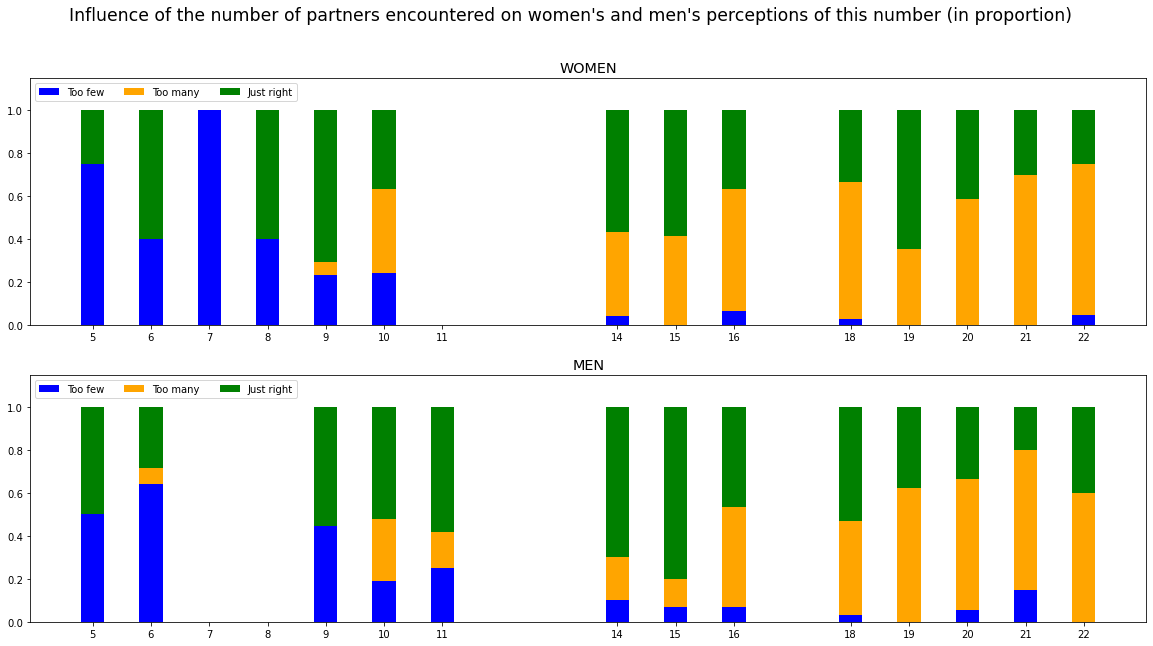

In [32]:
plt.figure(figsize=(20, 10))

plt.subplot(211)
plot_assessment_per_gender(0)

plt.subplot(212)
plot_assessment_per_gender(1)

plt.suptitle("Influence of the number of partners encountered on women's and men's perceptions of this number (in proportion)", 
            fontsize='xx-large')
plt.show()

* Few people think they met too few partners at the event.
* Among those who believe that there were too many dates at the event, there are more women than men, whereas we find more men than women in the group of people who consider that the number of dates was just right.
* Unsurprisingly, the proportion of participants who consider the number of partners to be too low is higher in waves where the number of participants encountered is less than 11.

In [33]:
def plot_score_day_after(field, title, ylabel='', legend='', ax_plot=None, bins=10, statistic='count', anchor=None):
    sns.histplot(data=speed_dating_day_after_df.loc[
                (speed_dating_day_after_df["iid"].duplicated() == False),
                [field, "gender"]],
                 x=field,
                 hue="gender",
                 hue_order=[0, 1],
                 palette={0:'red', 1:'blue'},
                 element="step",
                 bins=bins,
                 stat=statistic,
                 ax=ax_plot
             )    
    if ax_plot is None:
        plt.legend(legend, ncol=2, bbox_to_anchor=anchor)
        plt.ylabel(ylabel, fontsize='x-large')
        plt.xlabel("")
        plt.title(title, loc='left')
    else:
        ax_plot.set_xlabel('')
        ax_plot.set_ylabel(ylabel, fontsize='x-large')
        ax_plot.legend(legend, ncol=2, bbox_to_anchor=anchor)
        ax_plot.set_title(title, loc='left')

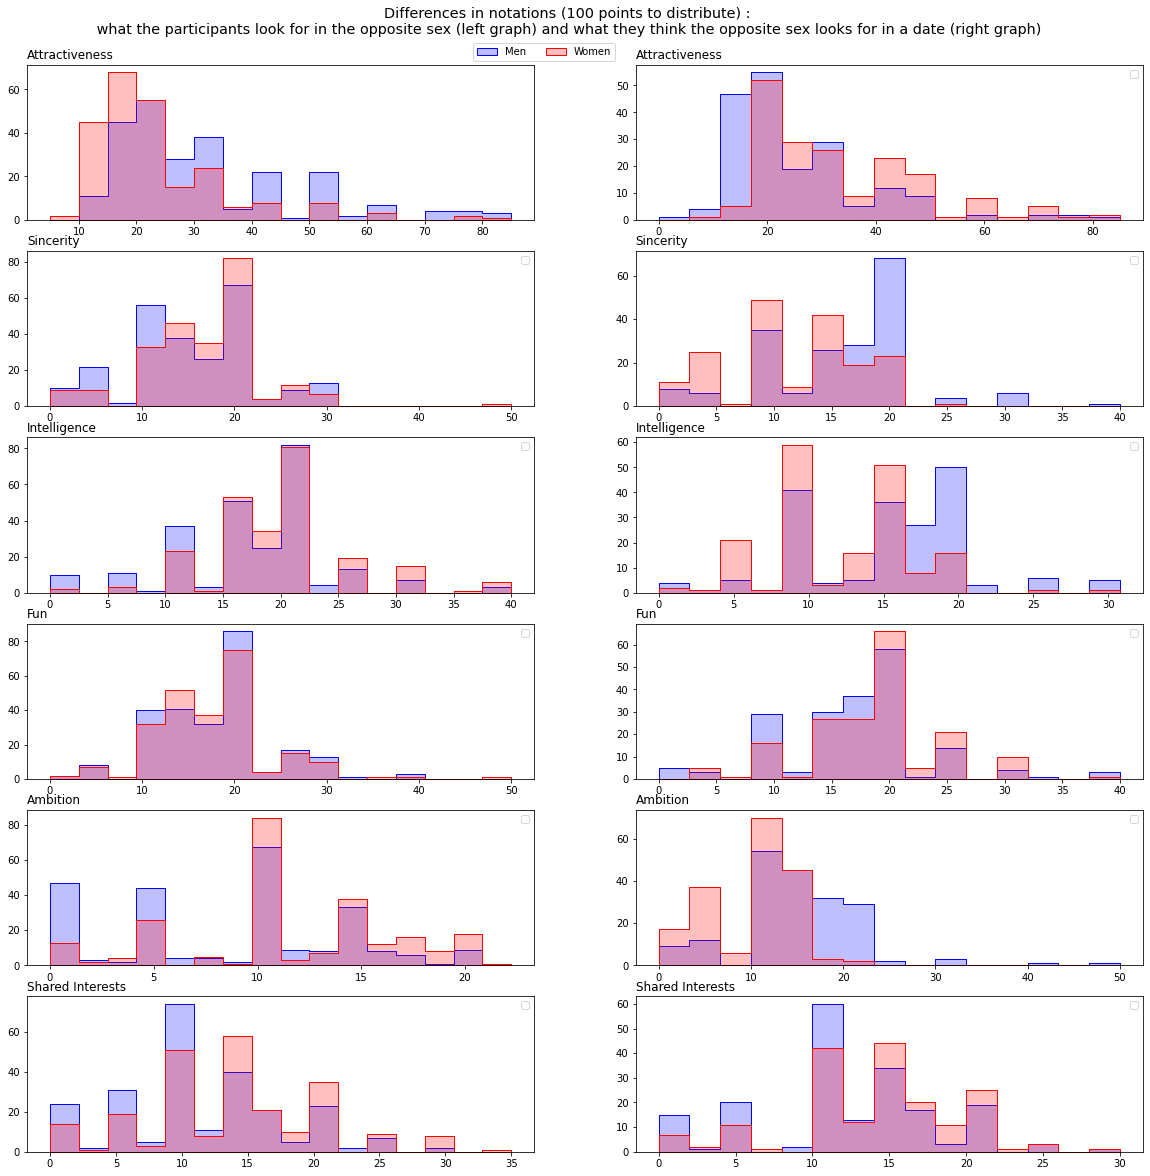

In [34]:
plt.figure(figsize=(20,20))

fields = {
            "Attractiveness":("attr1_2", "attr2_2"),
            "Sincerity":("sinc1_2", "sinc2_2"),
            "Intelligence":("intel1_2", "intel2_2"),
            "Fun":("fun1_2", "fun2_2"),
            "Ambition":("amb1_2", "amb2_2"),
            "Shared Interests":("shar1_2", "shar2_2")
}

for ind, elt in enumerate(fields):
    plt.subplot(6, 2, 2*ind + 1)
    if 2*ind + 1 == 1:
        plot_score_day_after(fields[elt][0], title=elt, legend=["Men", "Women"], anchor=(1.17, 1.17), bins='rice')
    else:
        plot_score_day_after(fields[elt][0], title=elt, bins='rice')
    plt.subplot(6, 2, 2*ind + 2)
    plot_score_day_after(fields[elt][1], title=elt, bins='rice')

plt.suptitle("Differences in notations (100 points to distribute) :\n what the participants look for in the opposite sex (left graph) and what they think "
             +"the opposite sex looks for in a date (right graph)", 
             fontsize="x-large",
             y= .92)
plt.show()

There are 100 points to distribute among 6 attributes. If someone had wanted to give as much importance to all the attributes, they would have awarded 16-17 points to each of them.
* Attractiveness :  women seem to attach little importance to this attribute since a large proportion of them gave a score below 20 and more men than women gave ratings above 25.
* Sincerity : while both women and men gave scores between 10 and 25, women thought that men paid less attention to sincerity than they did (many marks below 16).
* Intelligence : men believed that women paid more attention to intelligence compared to what women thought about how men rated the importance of intelligence in dating.
* Fun : both women and men mainly rated this attribute between 10 and 22 with a large proportion around 20.
* Ambition : both women and men gave this attribute low marks, with most giving marks below 16 ; women were more likely to think that the opposite sex does not look for ambition in a date.
* Shared interests : there appears to be two groups of people among women and men : those who think that having shared interests is not very important (scores below 12), men outnumber women in this group ; and those who believe that this attribute is slightly more important (scores above 13 and up to 30), here we find more women than men.

### In summary

* The day after the event, when rating the partners they met on the same attributes as in the first two points of time, men seem to pay more attention to attractiveness than women.
* Overall, men were more satisfied than women with the partners they met.
* On all the waves, almost no participant thought that the time allowed to get to know each other was too long.
* Most participants felt that the number of dates they had was either too many or just right.

## 3-4 weeks after

In [35]:
speed_dating_weeks_after_df = pd.read_csv("weeks_after.csv")

In [36]:
speed_dating_weeks_after_df.head()

,iid,gender,wave,round,age,race,dec,like,prob,met,match,samerace,match_es,you_call,them_cal,date_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3
0,1,0,1,10,21.0,4.0,1,7.0,6.0,2.0,0,0,4.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,1,10,21.0,4.0,1,7.0,5.0,1.0,0,0,4.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,1,10,21.0,4.0,1,7.0,NaN,1.0,1,1,4.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,1,10,21.0,4.0,1,7.0,6.0,2.0,1,0,4.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,1,10,21.0,4.0,1,6.0,6.0,2.0,1,0,4.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
speed_dating_weeks_after_df.shape

(3974, 28)

In [38]:
speed_dating_weeks_after_df["iid"].nunique()

263

In [39]:
(speed_dating_weeks_after_df[["iid", "match"]].groupby("iid")["match"].max() == 1).value_counts()

True     226
False     37
Name: match, dtype: int64

As we have seen in the first part of Data Understanding, many people did not respond to the last stage of this study. We went from 8378 observations to 3271 records. Only 37 out of 263 people were not matched.

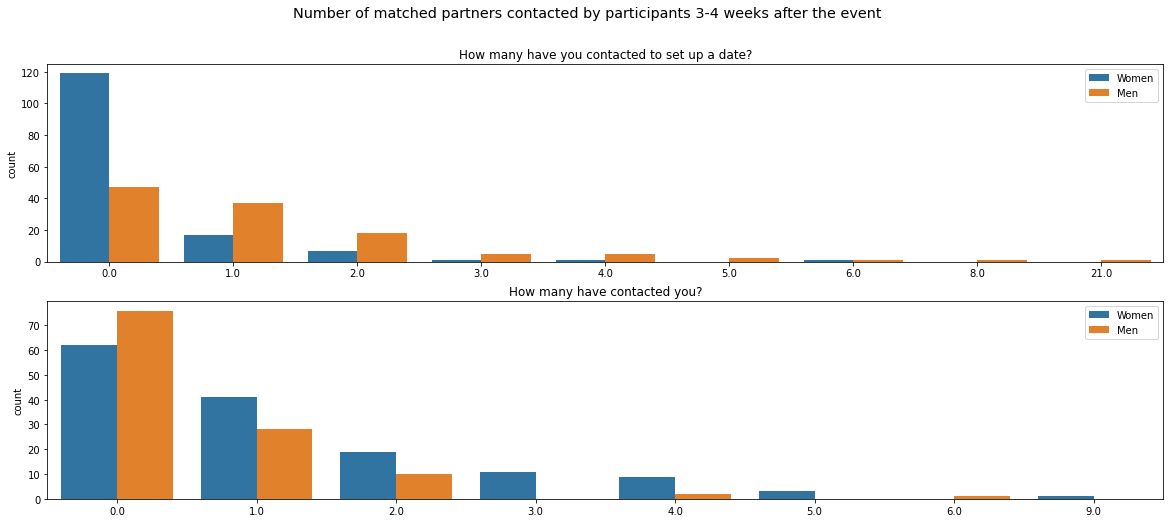

In [40]:
plt.figure(figsize=(20, 8))

plt.subplot(211)
sns.countplot(data=speed_dating_weeks_after_df.loc[speed_dating_weeks_after_df["iid"].duplicated() == False,
                                                   ["you_call", "gender"]],
              x="you_call",
              hue="gender"
             )
plt.legend(["Women", "Men"], loc='upper right')
plt.xlabel('')
plt.title("How many have you contacted to set up a date?")

plt.subplot(212)
sns.countplot(data=speed_dating_weeks_after_df.loc[speed_dating_weeks_after_df["iid"].duplicated() == False,
                                                   ["them_cal", "gender"]],
              x="them_cal",
              hue="gender"
             )
plt.legend(["Women", "Men"], loc='upper right')
plt.xlabel('')
plt.title("How many have contacted you?")

plt.suptitle("Number of matched partners contacted by participants 3-4 weeks after the event", fontsize='x-large')
plt.show()

In [41]:
speed_dating_weeks_after_df.loc[
    (speed_dating_weeks_after_df["iid"].duplicated() == False) & 
        ((speed_dating_weeks_after_df["you_call"] == 21) | (speed_dating_weeks_after_df["them_cal"].isin([6, 9]))),
    ["iid", "wave", "round","gender", "race", "samerace", "match_es", "you_call", "them_cal"]]

,iid,wave,round,gender,race,samerace,match_es,you_call,them_cal
843,105,4,18,1,1.0,0,NaN,8.0,6.0
2231,268,11,21,0,3.0,0,5.0,0.0,9.0
2729,332,13,10,1,4.0,1,3.0,21.0,1.0


In [42]:
(speed_dating_weeks_after_df.loc[speed_dating_weeks_after_df["iid"].isin([105, 268, 332]), ]
.groupby(["iid", "gender", "round"])["match"]
.sum())

iid  gender  round
105  1       18        8
268  0       21       10
332  1       10        2
Name: match, dtype: int64

* It is not surprising that few women contacted men to set up a date, let alone that more women than men were contacted. 
* Among the individuals with extreme values, we find : 
    - a man (iid=105) who was wery successful (8 matches out of 18 partners) and surely contacted them 
    - a woman (iid=268) who was contacted by 9 out of 10 matches she obtained (almost 50% of the men she met at that event)
    - a man (iid=332) who contacted 21 women but only got 2 matches : that must be an error.

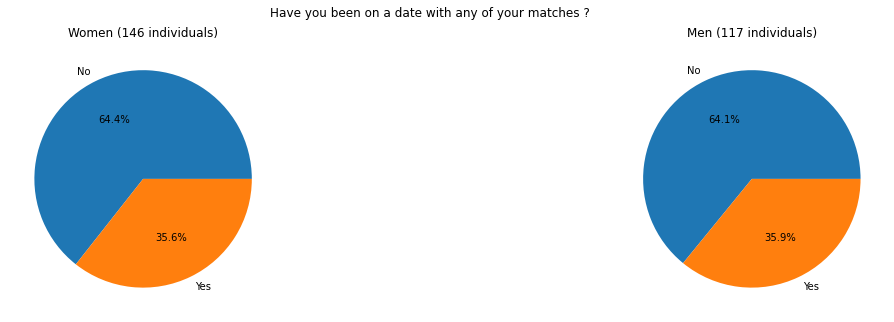

In [43]:
plt.figure(figsize=(20, 5))

headcount_women = speed_dating_weeks_after_df.loc[
                (speed_dating_weeks_after_df["iid"].duplicated() == False) & (speed_dating_weeks_after_df["gender"] == 0),
                "date_3"].count()
headcount_men = speed_dating_weeks_after_df.loc[
                (speed_dating_weeks_after_df["iid"].duplicated() == False) & (speed_dating_weeks_after_df["gender"] == 1),
                "date_3"].count()

plt.subplot(121)
plt.pie(speed_dating_weeks_after_df.loc
            [(speed_dating_weeks_after_df["iid"].duplicated() == False) & (speed_dating_weeks_after_df["gender"] == 0),
            "date_3"].value_counts(),
        labels=["No", "Yes"],
        autopct='%1.1f%%')
plt.title("Women (%d individuals)" % headcount_women)

plt.subplot(122)
plt.pie(speed_dating_weeks_after_df.loc
            [(speed_dating_weeks_after_df["iid"].duplicated() == False) & (speed_dating_weeks_after_df["gender"] == 1),
            "date_3"].value_counts(),
        labels=["No", "Yes"],
        autopct='%1.1f%%')
plt.title("Men (%d individuals)" % headcount_men)

plt.suptitle("Have you been on a date with any of your matches ?")
plt.show()

We do not see a difference between women and men : 64% of them did not have a date with any of their partners, compared to 36%.

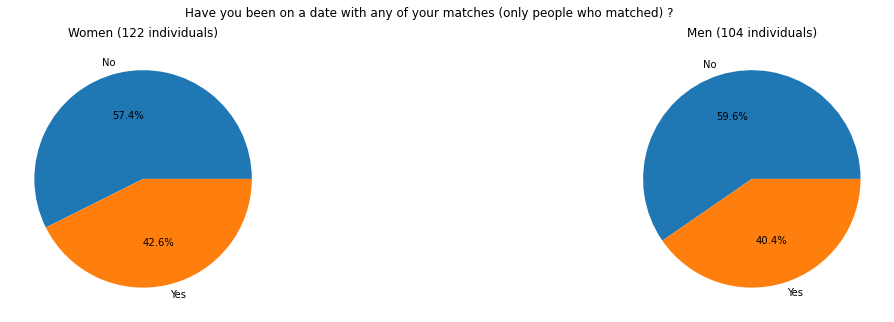

In [44]:
plt.figure(figsize=(20, 5))

speed_dating_weeks_after_matched_df = (speed_dating_weeks_after_df.loc[
                (speed_dating_weeks_after_df["iid"].duplicated() == False), ["iid", "gender", "date_3"]].set_index("iid")
                [(speed_dating_weeks_after_df[["iid", "match"]].groupby("iid")["match"].max() == 1)])

plt.subplot(121)
plt.pie(speed_dating_weeks_after_matched_df.loc[(speed_dating_weeks_after_matched_df["gender"] == 0), "date_3"].value_counts(),
        labels=["No", "Yes"],
        autopct='%1.1f%%')
plt.title("Women (%d individuals)" % len(speed_dating_weeks_after_matched_df[speed_dating_weeks_after_matched_df["gender"] == 0]))

plt.subplot(122)
plt.pie(speed_dating_weeks_after_matched_df.loc[(speed_dating_weeks_after_matched_df["gender"] == 1), "date_3"].value_counts(),
        labels=["No", "Yes"],
        autopct='%1.1f%%')
plt.title("Men (%d individuals)" % len(speed_dating_weeks_after_matched_df[speed_dating_weeks_after_matched_df["gender"] == 1]))

plt.suptitle("Have you been on a date with any of your matches (only people who matched) ?")
plt.show()

There is very little difference between women and men : only 4 out of 10 of those who matched had been on a date with one of their matches.

In [45]:
def plot_score_weeks_after(field, title, ylabel='', legend='', ax_plot=None, bins=10, statistic='count', anchor=None):
    sns.histplot(data=speed_dating_weeks_after_df.loc[
                (speed_dating_weeks_after_df["iid"].duplicated() == False),
                [field, "gender"]],
                 x=field,
                 hue="gender",
                 hue_order=[0, 1],
                 palette={0:'red', 1:'blue'},
                 element="step",
                 bins=bins,
                 stat=statistic,
                 ax=ax_plot
             )                 
    if ax_plot is None:
        plt.legend(legend, ncol=2, bbox_to_anchor=anchor)
        plt.xlabel('')
        plt.ylabel(ylabel, fontsize='x-large')
        plt.title(title, loc='left')
    else:
        ax_plot.set_xlabel('')
        ax_plot.set_ylabel(ylabel, fontsize='x-large')
        ax_plot.legend(legend, ncol=2, bbox_to_anchor=anchor)
        ax_plot.set_title(title, loc='left')

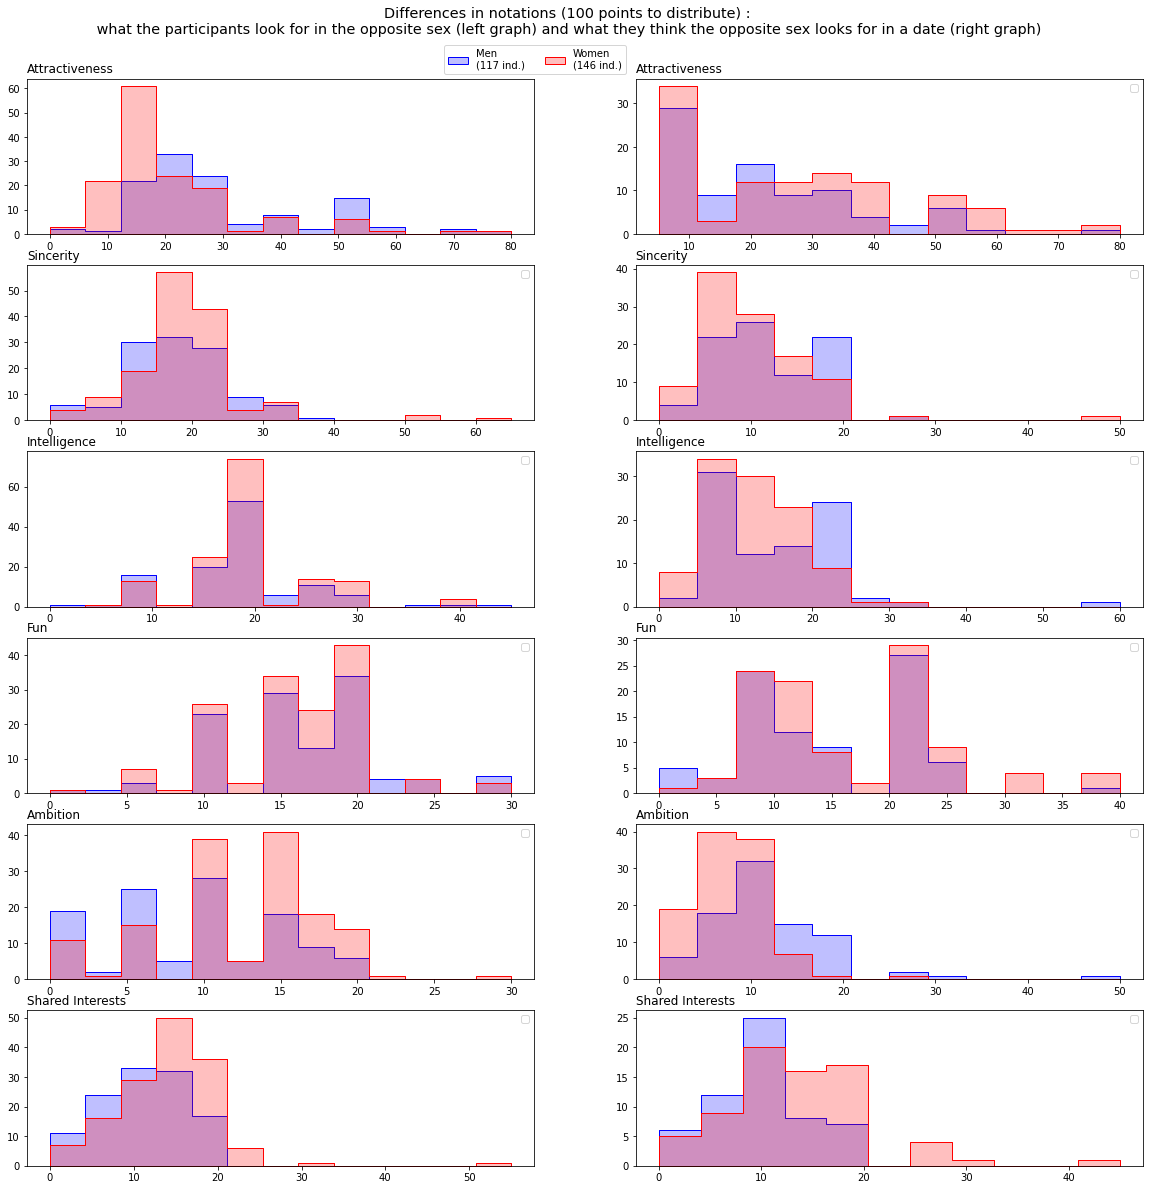

In [46]:
plt.figure(figsize=(20,20))

fields = {
            "Attractiveness":("attr1_3", "attr2_3"),
            "Sincerity":("sinc1_3", "sinc2_3"),
            "Intelligence":("intel1_3", "intel2_3"),
            "Fun":("fun1_3", "fun2_3"),
            "Ambition":("amb1_3", "amb2_3"),
            "Shared Interests":("shar1_3", "shar2_3")
}

headcount_women = len(speed_dating_weeks_after_df.loc[
    (speed_dating_weeks_after_df["iid"].duplicated() == False) & (speed_dating_weeks_after_df["gender"] == 0)])
headcount_men = len(speed_dating_weeks_after_df.loc[
    (speed_dating_weeks_after_df["iid"].duplicated() == False) & (speed_dating_weeks_after_df["gender"] == 1)])

for ind, elt in enumerate(fields):
    plt.subplot(6, 2, 2*ind + 1)
    if 2*ind + 1 == 1:
        plot_score_weeks_after(
            fields[elt][0], 
            title=elt, 
            legend=["Men\n(%d ind.)" % headcount_men, "Women\n(%d ind.)" % headcount_women], 
            anchor=(1.19, 1.25),
            bins='rice'
        )
    else:
        plot_score_weeks_after(fields[elt][0], title=elt, bins='rice')
    plt.subplot(6, 2, 2*ind + 2)
    plot_score_weeks_after(fields[elt][1], title=elt, bins='rice')

plt.suptitle("Differences in notations (100 points to distribute) :\n what the participants look for in the opposite sex (left graph) and what they think \
the opposite sex looks for in a date (right graph)", 
             fontsize="x-large",
             y= .93)
plt.show()

There are 100 points to distribute among 6 attributes. If someone had wanted to give as much importance to all the attributes, they would have awarded 16-17 points to each of them.
* Attractiveness : more than 50% of the women gave scores between 8 and 17; moreover,  a lot of women and men thought that the opposite sex looks for attractiveness in a date, as shown by the scores above 20 in the graph on the right, some even gave scores above 50.
* Sincerity : the graphs are quite similar for women and men, with most giving scores between 10 and 25. 3 or 4 women gave a high score (above 50) for this attribute.
* Intelligence : women and men rated the importance of this attribute very similarly; we can say that both women and men look for intelligence in the opposite sex as the most frequent scores are in the range [17, 22].
* Fun : again, women and men gave almost identical scores; on the one hand, women and men think this attribute is somewhat important (most scores are between 14 and 20), on the other hand, there are two groups of people: those who gave scores between 5 and 15 (not very important) thinking about what their partners answered, and those who think that the opposite sex pays more attention to this attribute (scores above 20 and up to 40).
* Ambition : we can distinguish 3 groups of women on the left graph: in ascending order of numbers, there is the group that scored between 0 and 6, those who scored between 9 and 14, and those who scored between 15 and 21. There are also three groups of men that we can rank in ascending order : the group that scored between 15 and 21, those who scored between 9 and 14 and finally the men who scored between 0 and 6.
* Shared interests : women were more likely to think that men scored in the same way as they did, i.e. by awarding scores between 9 and 21.

### In summary

* We are now working on 263 participants, 37 of whom have not been matched.
* More women than men were contacted to set up a date.
* 60% of the participants did not have a (second) date with one of their matches.
* Women and men gave similar scores on several attributes.
* Regarding the attribute "attractiveness", both women and men were very likely to think that the opposite sex looks for this attribute as they gave high scores (above 20 and up to 60 for most of them).

## Comparison and conclusion
### Comparison between the three main moments

In [47]:
speed_dating_during_registration_df = pd.read_csv("during_registration.csv")
speed_dating_during_registration_df.shape

(8378, 40)

In [48]:
def plot_score_during_registration(field, title, ylabel='', legend='', ax_plot=None, bins=10, statistic='count', anchor=None):
    sns.histplot(data=speed_dating_during_registration_df.loc[
                (speed_dating_during_registration_df["iid"].duplicated() == False),
                [field, "gender"]],
                x=field,
                hue="gender",
                hue_order=[0, 1],
                palette={0:'red', 1:'blue'},
                element="step", 
                bins=bins,
                stat=statistic,
                ax=ax_plot
             )                 
    if ax_plot is None:
        plt.legend(legend, ncol=2, bbox_to_anchor=anchor)
        plt.xlabel('')
        plt.ylabel(ylabel, fontsize='x-large')
        plt.title(title, loc='left')
    else:
        ax_plot.set_xlabel('')
        ax_plot.set_ylabel(ylabel, fontsize='x-large')
        ax_plot.legend(legend, ncol=2, bbox_to_anchor=anchor)
        ax_plot.set_title(title, loc='left')

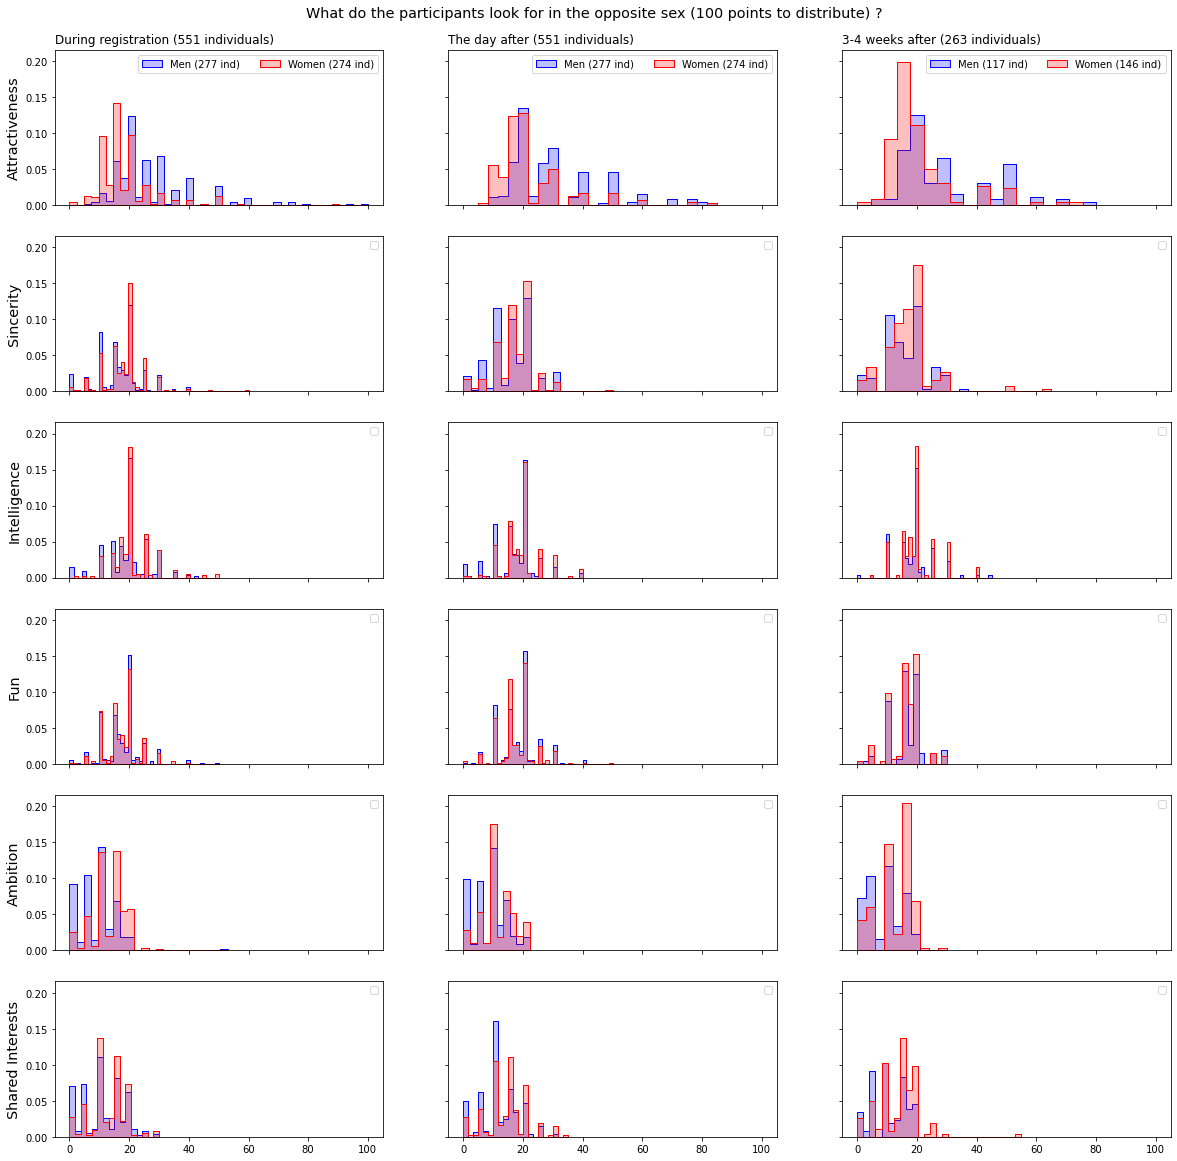

In [49]:
fig, axs = plt.subplots(6, 3, figsize=(20, 20), sharex=True, sharey=True)

fields = {
            "Attractiveness":("attr1_1", "attr1_2", "attr1_3"),
            "Sincerity":("sinc1_1", "sinc1_2", "sinc1_3"),
            "Intelligence":("intel1_1", "intel1_2", "intel1_3"),
            "Fun":("fun1_1", "fun1_2", "fun1_3"),
            "Ambition":("amb1_1", "amb1_2", "amb1_3"),
            "Shared Interests":("shar1_1", "shar1_2", "shar1_3")
}

headcount_during_registration = len(speed_dating_during_registration_df.loc[(speed_dating_during_registration_df["iid"].duplicated() == False)])
headcount_day_after = len(speed_dating_day_after_df.loc[(speed_dating_day_after_df["iid"].duplicated() == False)])
headcount_weeks_after = len(speed_dating_weeks_after_df.loc[(speed_dating_weeks_after_df["iid"].duplicated() == False)])

headcount_women_during_registration = len(speed_dating_during_registration_df.loc[(speed_dating_during_registration_df["iid"].duplicated() == False)
                                       & (speed_dating_during_registration_df["gender"] == 0)])
headcount_women_day_after = len(speed_dating_day_after_df.loc[(speed_dating_day_after_df["iid"].duplicated() == False)
                                       & (speed_dating_day_after_df["gender"] == 0)])
headcount_women_weeks_after = len(speed_dating_weeks_after_df.loc[(speed_dating_weeks_after_df["iid"].duplicated() == False)
                                       & (speed_dating_weeks_after_df["gender"] == 0)])

headcount_men_during_registration = len(speed_dating_during_registration_df.loc[(speed_dating_during_registration_df["iid"].duplicated() == False)
                                       & (speed_dating_during_registration_df["gender"] == 1)])
headcount_men_day_after = len(speed_dating_day_after_df.loc[(speed_dating_day_after_df["iid"].duplicated() == False)
                                       & (speed_dating_day_after_df["gender"] == 1)])
headcount_men_weeks_after = len(speed_dating_weeks_after_df.loc[(speed_dating_weeks_after_df["iid"].duplicated() == False)
                                       & (speed_dating_weeks_after_df["gender"] == 1)])

for ind, elt in enumerate(fields):
    plot_score_during_registration(fields[elt][0], 
                                   ("During registration (%d individuals)" % headcount_during_registration if ind == 0 else ''), 
                                   ylabel=elt,
                                   legend=(["Men (%d ind)" % headcount_men_during_registration, 
                                            "Women (%d ind)" % headcount_women_during_registration] if ind == 0 else ''),
                                   statistic='proportion',
                                   bins='auto',
                                   ax_plot=axs[ind, 0])
    plot_score_day_after(fields[elt][1], 
                         ("The day after (%d individuals)" % headcount_day_after if ind == 0 else ''), 
                         legend=(["Men (%d ind)" % headcount_men_day_after, 
                                  "Women (%d ind)" % headcount_women_day_after] if ind == 0 else ''), 
                         statistic='proportion',
                         bins='auto',
                         ax_plot=axs[ind, 1])
    plot_score_weeks_after(fields[elt][2], 
                           ("3-4 weeks after (%d individuals)" % headcount_weeks_after if ind == 0 else ''), 
                           legend=(["Men (%d ind)" % headcount_men_weeks_after,
                                    "Women (%d ind)" % headcount_women_weeks_after] if ind == 0 else ''),
                           statistic='proportion',
                           bins='auto',
                           ax_plot=axs[ind, 2])
    
plt.suptitle("What do the participants look for in the opposite sex (100 points to distribute) ?", 
             fontsize="x-large",
             y= .91)
plt.show()

Before concluding, we will see if there are differences in perception depending on when the candidates fill in the form.
* Attractiveness : the graphs are very similar ; we can say that there are more women giving scores below 20 3-4 weeks after the event.
* Sincerity : the graphs are extremely similar.
* Intelligence : there are no big differences between the three graphs, we see the same peak around 20 for women and men.
* Fun : we find the three peaks between 10 and 20 but they are not of the same intensity, the distribution of scores narrows around these peaks as time goen on, there are no more scores going above 30 3-4 weeks after.
* Ambition : on the three graphs, the distribution of scores ranges from 0 to 20 (not counting outliers) ; the differences are found on the women's side, the day after the event there are more women giving scores around 10, and 3-4 weeks after the event the women's scores are concentrated around 10 on the one hand and around 20 on the other. 
* Shared interests : the distribution of scores remains spread out from 0 to 30 ; note that the highest peak changes colour from one moment to the next :
    - during registration, the highest peak for both women and men is around 10 ;
    - the day after the event, the highest peak for women is about 17 and the highest peak for men is about 10 (the highest peak when considering all three charts) ;
    - 3-4 weeks after the event, the highest peak for women is around 17 and the highest peak for men remains around 10.

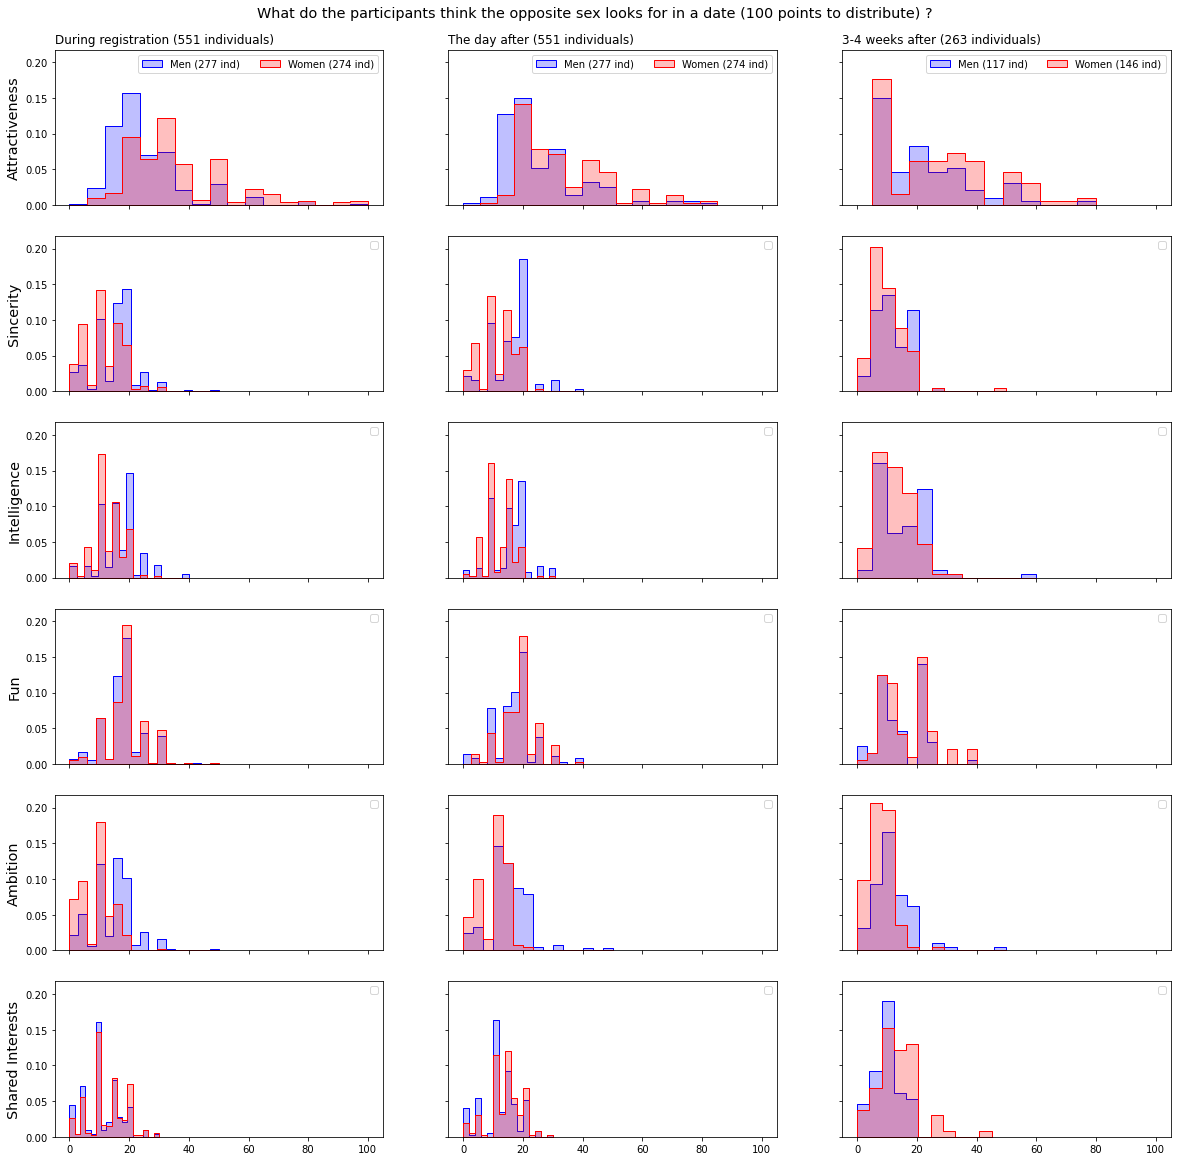

In [50]:
fig, axs = plt.subplots(6, 3, figsize=(20, 20), sharex=True, sharey=True)

fields = {
            "Attractiveness":("attr2_1", "attr2_2", "attr2_3"),
            "Sincerity":("sinc2_1", "sinc2_2", "sinc2_3"),
            "Intelligence":("intel2_1", "intel2_2", "intel2_3"),
            "Fun":("fun2_1", "fun2_2", "fun2_3"),
            "Ambition":("amb2_1", "amb2_2", "amb2_3"),
            "Shared Interests":("shar2_1", "shar2_2", "shar2_3")
}

headcount_during_registration = len(speed_dating_during_registration_df.loc[
                                    (speed_dating_during_registration_df["iid"].duplicated() == False)])
headcount_day_after = len(speed_dating_day_after_df.loc[(speed_dating_day_after_df["iid"].duplicated() == False)])
headcount_weeks_after = len(speed_dating_weeks_after_df.loc[(speed_dating_weeks_after_df["iid"].duplicated() == False)])

headcount_women_during_registration = len(speed_dating_during_registration_df.loc[(speed_dating_during_registration_df["iid"].duplicated() == False)
                                       & (speed_dating_during_registration_df["gender"] == 0)])
headcount_women_day_after = len(speed_dating_day_after_df.loc[(speed_dating_day_after_df["iid"].duplicated() == False)
                                       & (speed_dating_day_after_df["gender"] == 0)])
headcount_women_weeks_after = len(speed_dating_weeks_after_df.loc[(speed_dating_weeks_after_df["iid"].duplicated() == False)
                                       & (speed_dating_weeks_after_df["gender"] == 0)])

headcount_men_during_registration = len(speed_dating_during_registration_df.loc[(speed_dating_during_registration_df["iid"].duplicated() == False)
                                       & (speed_dating_during_registration_df["gender"] == 1)])
headcount_men_day_after = len(speed_dating_day_after_df.loc[(speed_dating_day_after_df["iid"].duplicated() == False)
                                       & (speed_dating_day_after_df["gender"] == 1)])
headcount_men_weeks_after = len(speed_dating_weeks_after_df.loc[(speed_dating_weeks_after_df["iid"].duplicated() == False)
                                       & (speed_dating_weeks_after_df["gender"] == 1)])

for ind, elt in enumerate(fields):
    plot_score_during_registration(fields[elt][0], 
                                   ("During registration (%d individuals)" % headcount_during_registration if ind == 0 else ''), 
                                   ylabel=elt,
                                   legend=(["Men (%d ind)" % headcount_men_during_registration, 
                                  "Women (%d ind)" % headcount_women_during_registration] if ind == 0 else ''),
                                   statistic='proportion',
                                   bins='rice',
                                   ax_plot=axs[ind, 0])
    plot_score_day_after(fields[elt][1], 
                         ("The day after (%d individuals)" % headcount_day_after if ind == 0 else ''), 
                         legend=(["Men (%d ind)" % headcount_men_day_after, 
                                  "Women (%d ind)" % headcount_women_day_after] if ind == 0 else ''),
                         statistic='proportion',
                         bins='rice',
                         ax_plot=axs[ind, 1])
    plot_score_weeks_after(fields[elt][2], 
                           ("3-4 weeks after (%d individuals)" % headcount_weeks_after if ind == 0 else ''), 
                           legend=(["Men (%d ind)" % headcount_men_weeks_after, 
                                  "Women (%d ind)" % headcount_women_weeks_after] if ind == 0 else ''),
                           statistic='proportion',
                           bins='rice',
                           ax_plot=axs[ind, 2])
    
plt.suptitle("What do the participants think the opposite sex looks for in a date (100 points to distribute) ?", 
             fontsize="x-large",
             y= .91)
plt.show()

Let us see if the participants changed their minds about what the opposite sex looks for in a date.
* Attractiveness : over time, more women (in proportion) gave scores below 16, while the distribution of scores for men remained concentrated on the left (marks below 20)
* Sincerity : during registration and the day after the event, men were more numerous to think that women gave good scores on this attribute (marks between 17 and 20) ; 3-4 weeks after the event, both women and men were more likely to give marks below 16, especially women with over 60% of the headcount
* Intelligence : the graphs are very similar for women ; for men, the first two charts are similar, in the third one, we find more men giving scores below 10 (38% of men against 19% and 26% in the first two graphs)
* Fun : there are no major changes between the first two graphs ; the difference with the third chart lies mainly in the fact that both women and men were more likely to give scores below 15, as shown by the peak around 10.
* Ambition : the three charts are quite similar, as all participants (not counting a few) gave marks between 0 and 20, with a peak around 10 (27% of participants during registration, 19% the day after, 22% 3-4 weeks after).
* Shared interests : the remarks made on the three graphs of the ambition attribute can be said for this attribute, although we can add an element on the third graph, namely that 3-4 weeks after, a significant part of the women thought that the men gave scores higher than 20 on this attribute (almost a quarter of the women).

### Final conclusion

* 277 men and 274 women participated in these events, which brought together a number of people (different for each session), most of whom are between 20 and 35 years old.
* Meeting new people and having fun motivated most people to participate in these events, which is probably why:     
    - a large majority of participants expected to have less than 3 matches
    - the participants felt that the number of dates they had was either too high or just right.
    - the time given to get to know each other was sufficient to judge the other as truly sincere
    - more than 50% did not wish to see the partners they met again
* The participants did not take into account the race and religion of the partner they met in their willingness to meet the other again.
* Instead of will, we should speak of indecision : although the match rate was low across all waves (on average 20%), three-fifths of participants did not wish to meet any of their matches outside the event.
* Attractiveness remains an important attribute, especially for men who were generally satisfied with the partners they met at these events. This fact is very well understood by women.